Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
calories=pd.read_csv('calories.csv')
exercise=pd.read_csv('exercise.csv')

In [3]:
calories

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0
...,...,...
14995,15644082,45.0
14996,17212577,23.0
14997,17271188,75.0
14998,18643037,11.0


In [4]:
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


Combining the two dataframes

In [5]:
dataset=pd.merge(exercise,calories,on='User_ID')

In [6]:
dataset

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


**Finding Correlation**

<Axes: >

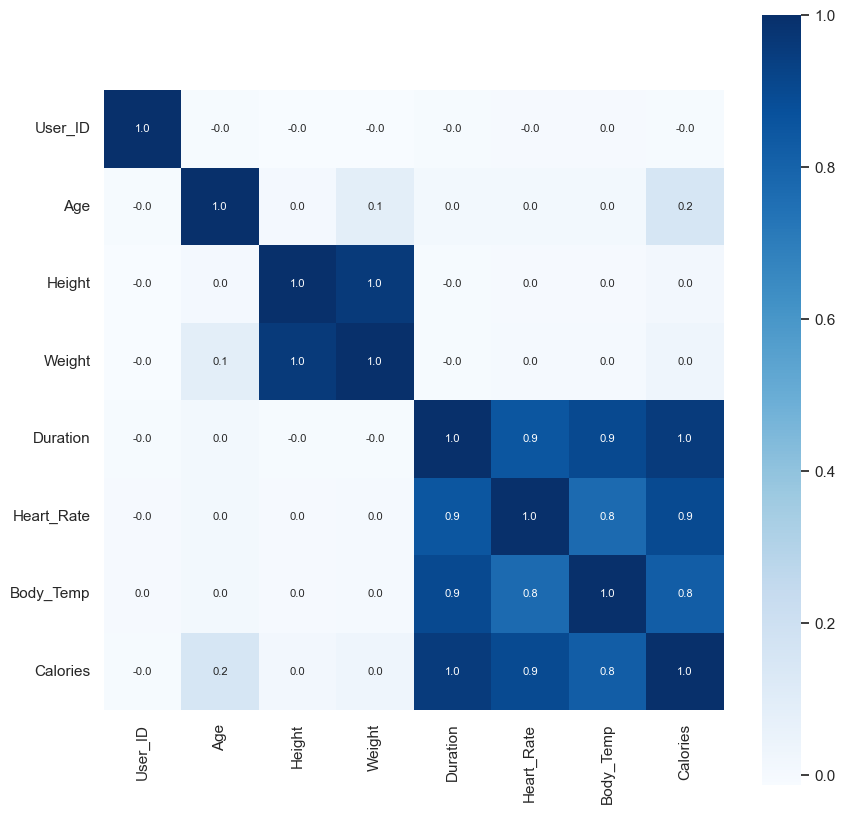

In [7]:
numeric_dataset = dataset.select_dtypes(include=['float64', 'int64'])
correlation=numeric_dataset.corr()
plt.figure(figsize=(10,10))
sns.set()
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [8]:
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1]

In [9]:
X

array([['male', 68, 190.0, ..., 29.0, 105.0, 40.8],
       ['female', 20, 166.0, ..., 14.0, 94.0, 40.3],
       ['male', 69, 179.0, ..., 5.0, 88.0, 38.7],
       ...,
       ['female', 43, 159.0, ..., 16.0, 90.0, 40.1],
       ['male', 78, 193.0, ..., 2.0, 84.0, 38.3],
       ['male', 63, 173.0, ..., 18.0, 92.0, 40.5]], dtype=object)

In [10]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

Label Encoding the gender column

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[:,0]=le.fit_transform(X[:,0])

In [12]:
X

array([[1, 68, 190.0, ..., 29.0, 105.0, 40.8],
       [0, 20, 166.0, ..., 14.0, 94.0, 40.3],
       [1, 69, 179.0, ..., 5.0, 88.0, 38.7],
       ...,
       [0, 43, 159.0, ..., 16.0, 90.0, 40.1],
       [1, 78, 193.0, ..., 2.0, 84.0, 38.3],
       [1, 63, 173.0, ..., 18.0, 92.0, 40.5]], dtype=object)

Splitting dataset to training and test sets

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Standardisation

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,1:-1]=sc.fit_transform(X_train[:,1:-1])
X_test[:,1:-1]=sc.transform(X_test[:,1:-1])

In [15]:
X_train

array([[1, 1.1424703466194093, -0.1704145812212372, ...,
        -0.18277865322399492, -0.7845487332667928, 40.5],
       [1, 2.028380975201457, 0.5320362894351439, ...,
        1.5006166508509535, 1.308720891129046, 40.8],
       [0, 1.7921381409129111, -0.31090475535251344, ...,
        0.057706390215283426, -0.47055828960741697, 40.2],
       ...,
       [1, 0.5518632608980438, 1.7262027695509918, ...,
        -0.06253613150435573, 0.3667495601509186, 39.9],
       [0, 1.6149560151965014, 0.04032067997567714, ...,
        -0.7839912618221907, -1.7265200642449203, 40.0],
       [0, -0.7474723276889599, -1.294335974271447, ...,
        -0.5435062183829124, -0.8892122144865847, 39.8]], dtype=object)

In [16]:
X_test

array([[0, 1.8511988494850475, -0.662130190680704, ...,
        1.6208591725705925, 1.0993939286894623, 41.0],
       [1, 0.02031688374881504, 0.8130166376976964, ...,
        -0.30302117494363406, 0.1574225977113347, 39.9],
       [0, 0.02031688374881504, -1.856296670796552, ...,
        1.6208591725705925, 1.308720891129046, 40.5],
       ...,
       [0, -1.101836579121779, -0.662130190680704, ...,
        -1.1447188269811082, -0.15656784594804113, 39.5],
       [1, -0.4521687848282772, -0.1704145812212372, ...,
        0.7791615205331184, 0.2620860789311267, 40.9],
       [0, -0.8065330362610964, 0.2510559411725915, ...,
        -1.2649613487007474, -1.9358470266845043, 39.2]], dtype=object)

Multiple Linear

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred=regressor.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.9635569446110481

In [20]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.9689909  0.96865292 0.96769415 0.96738602 0.96734708 0.96756411
 0.96885406 0.96575773 0.96412689 0.96861523]
0.967498906997001
0.0014532989370559378


Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [22]:
y_pred=regressor.predict(X_test)

In [23]:
r2_score(y_pred, y_test)

0.9925793168631993

In [24]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.99278942 0.99285266 0.99182899 0.99249571 0.99221629 0.99159813
 0.99152176 0.99275777 0.99333967 0.99187009]
0.9923270501716044
0.0005812372822450667


Random Forest

In [25]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=300, random_state=1)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=300, random_state=1)

In [26]:
y_pred=regressor.predict(X_test)

In [27]:
r2_score(y_pred, y_test)

0.997709502177791

In [28]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.99787746 0.99785309 0.99761383 0.99819658 0.99816991 0.99692742
 0.99741578 0.99775782 0.99787051 0.99752107]
0.9977203475105881
0.00035605079691847203


Support Vector

In [29]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X_train,y_train)

SVR()

In [30]:
y_pred=regressor.predict(X_test)

In [31]:
r2_score(y_pred, y_test)

-0.14914286498707208

In [32]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.65526641 0.66180037 0.65990536 0.66186191 0.65450399 0.65913905
 0.66523717 0.65641071 0.67247043 0.64571001]
0.6592305401495295
0.006739265882746956


Polynomial

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
X_poly_train=poly_reg.fit_transform(X_train)
regressor=LinearRegression()
regressor.fit(X_poly_train,y_train) #type: ignore

LinearRegression()

In [34]:
X_poly_test=poly_reg.transform(X_test)
y_pred=regressor.predict(X_poly_test)

In [35]:
r2_score(regressor.predict(poly_reg.transform(X_train)),y_train)

0.9999782859158034

In [36]:
r2_score(y_pred, y_test)

0.999978994857021

In [37]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.9689909  0.96865292 0.96769415 0.96738602 0.96734708 0.96756411
 0.96885406 0.96575773 0.96412689 0.96861523]
0.967498906997001
0.0014532989370559378


XGBoost

In [38]:
from xgboost import XGBRegressor
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
y_pred=regressor.predict(X_test)

In [40]:
r2_score(y_pred, y_test)

0.9986805857581397

In [41]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
print(accuracies)
print(accuracies.mean())
print(accuracies.std())

[0.99881708 0.99887652 0.99857821 0.99874673 0.9987602  0.99840809
 0.99882901 0.99879544 0.99884879 0.99863035]
0.9987290406729723
0.0001396527497693399


Since XGBoost regression had the best accuracy hence we will select it

In [42]:
# Save the trained model
model_path = "fitburn_model.pkl"
scaler_path = "scaler.pkl"
label_encoder_path = "label_encoder.pkl"

joblib.dump(regressor, model_path)
joblib.dump(sc, scaler_path)
joblib.dump(le, label_encoder_path)

print(f"Model, scaler, and label encoder saved successfully!")

Model, scaler, and label encoder saved successfully!


Graph

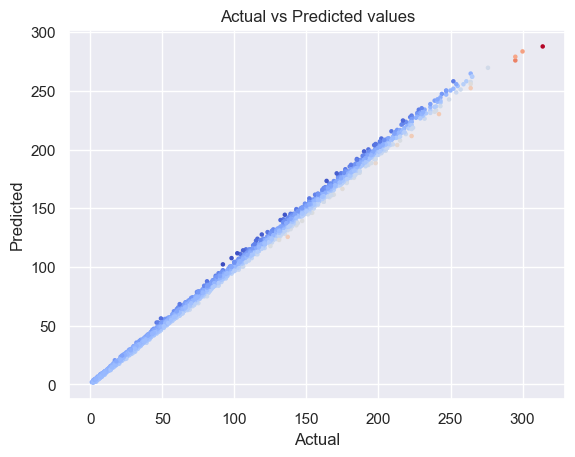

In [43]:
differences = y_test - y_pred
plt.scatter(y_test, y_pred, c=differences, cmap='coolwarm', s=5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted values")
plt.show()

User input and prediction

In [ ]:
# user_data=[]
# uid=input("Enter the user id: ")
# # no need to append this as user id is not part of the feature matrix
# gen=input("Enter your gender (male/female): ")
# user_data.append(gen)
# age=int(input("Enter your age: "))
# user_data.append(age)
# h=float(input("Enter your height in centimeters: "))
# user_data.append(h)
# w=float(input("Enter the weight in kg: "))
# user_data.append(w)
# dur=float(input("Enter the amount of hours you did workout: "))
# user_data.append(dur)
# hrate=float(input("Enter the heart rate you counted after workout: "))
# user_data.append(hrate)
# temp=float(input("Enter the body temperature after workout: "))
# user_data.append(temp)
# user_df = pd.DataFrame([user_data], columns=['Gender','Age','Height','Weight','Duration','Heart_Rate','Body_Temp'])
# data=np.array(user_df)
# data[:,0]=le.transform(data[:,0])
# data[:,1:-1]=sc.transform(data[:,1:-1])
# # data=poly_reg.transform(data)
# pred=regressor.predict(data)
# print("The calories burnt as per information provided is :",pred[0])